
Розмірність тренувальних зображень: (50000, 32, 32, 3)
Розмірність тестових зображень: (10000, 32, 32, 3)


<Figure size 1000x1000 with 0 Axes>



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

c:\Users\cherrypix\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 11s 8ms/step - loss: 0.6145 - accuracy: 0.7449 - val_loss: 0.5583 - val_accuracy: 0.7697
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5305 - accuracy: 0.7865 - val_loss: 0.5566 - val_accuracy: 0.7753
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4687 - accuracy: 0.8086 - val_loss: 0.5326 - val_accuracy: 0.7813
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4151 - accuracy: 0.8349 - val_loss: 0.4805 - val_accuracy: 0.8060
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3732 - accuracy: 0.8519 - val_loss: 0.5351 - val_accuracy: 0.8010
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3270 - accuracy: 0.8728 - val_loss: 0.4914 - val_accuracy: 0.8123
Epoch 8/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2850 - accuracy: 0.8894 - val_loss: 0.5084 - val_accuracy: 0.8

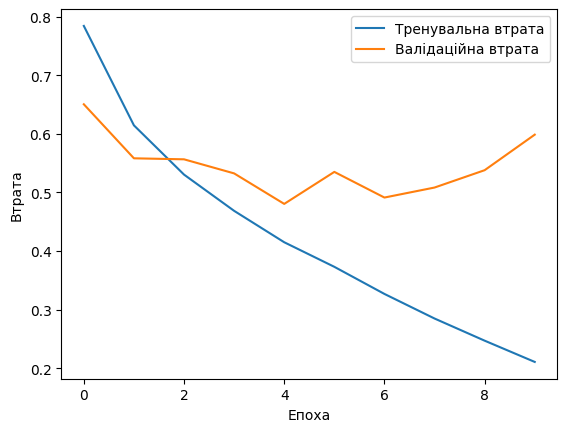

In [1]:
# Встановлення необхідних бібліотек
import tensorflow as tf
from keras import layers, models
from keras.optimizers.legacy import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np

# Завантаження даних
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Перевірка розмірності даних
print(f"Розмірність тренувальних зображень: {train_images.shape}")
print(f"Розмірність тестових зображень: {test_images.shape}")

selected_classes=[5,6,2]# dog / frog / bird
train_mask= np.isin(train_labels.flatten(), selected_classes)
test_mask=np.isin(test_labels.flatten (), selected_classes)

#Відфільтруємо дані
train_images, train_labels = train_images[train_mask],train_labels [train_mask]
test_images, test_labels = test_images[test_mask], test_labels[test_mask]

#we are doing normalization
train_images, test_images=train_images/255.0, test_images/255.0

#Візуалізуємо перших 9 зображень:
class_names = ['dog', 'frog', 'bird']
plt.figure(figsize=(10, 10))
class_index=0
for i in range (9):
    while class_index>=len(class_names):
        class_index=0
        current_class=selected_classes[class_index]
        class_images = train_images [train_labels.flatten() == current_class]
        plt.subplot(3, 3, i+1) 
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(class_images[i])
        plt.xlabel(class_names[class_index])
        class_index += 1
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))
model.summary()

#Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy'  , metrics=['accuracy'])
#Перетворення міток
class_mapping={5:0, 6:1, 2:2}

train_labels_mapped = np.vectorize(class_mapping.get) (train_labels)
test_labels_mapped = np.vectorize(class_mapping.get) (test_labels)

checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)
# Зупинка тренування, якщо немає поліпшень протягом 5 епох
early_stopping = EarlyStopping(monitor="val_loss", patience=5)

history = model.fit(train_images, train_labels_mapped, epochs=50, batch_size=10, validation_data = (test_images, test_labels_mapped),
                    callbacks=[checkpoint, early_stopping])
# Візуалізація процесу тренування
plt.plot(history.history['loss'], label='Тренувальна втрата')
plt.plot(history.history['val_loss'], label='Валідаційна втрата')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()



In [3]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Визначення показників якості
test_loss, test_acc = model.evaluate(test_images, test_labels_mapped, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')


94/94 - 0s - loss: 0.5987 - accuracy: 0.8150 - 388ms/epoch - 4ms/step

Точність на тестових даних: 0.8149999976158142
